# HW 9 - Investigating Chaotic systems with python


## Excercise 1

Recall the Holling-Tanner Model of an ecological system

*Plants*  
$\dot{x} = x(1-x) - \frac{a_1x}{1+b_1x}y$  

*Herbivores*  
$\dot{y} = \frac{a_1x}{1+b_1x}y - d_1y-\frac{a_2y}{1+b_2y}z$  

*Carnivores*  
$\dot{z} = \frac{a_2y}{1+b_2y}z - d_2z$


Simulate these equations for at least two sets of initial conditions that are less than 1% apart using the following parameters  
`a1 = 5`  
`b1 = 3`  
`a2 = 0.1`  
`b2 = 2`  
`d1 = 0.4`  
`d2 = 0.01`  

Plot the results as both a time series and trajectories. What eventually happens to the trajectories?

In [2]:
import numpy as np
from scipy.integrate import odeint
import scipy as sp
import matplotlib.pyplot as plt

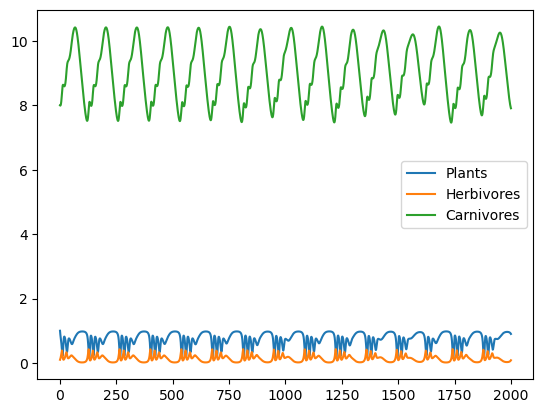

In [24]:
def HollingTanner(state, t, a1 = 5, b1 = 3, a2 = 0.1, b2 = 2, d1 = 0.4, d2 = 0.01):
    
    x = state[0]
    y = state[1]
    z = state[2]
    
    dxdt = x*(1-x) - ((a1*x)/(1+b1*x))*y 
    dydt = ((a1*x)/(1+b1*x))*y - d1*y - ((a2*y)/(1+b2*y))*z
    dzdt = ((a2*y)/(1+b2*y))*z - d2*z
    
    return [dxdt, dydt, dzdt]    

t = np.linspace(0,2000,100000)
state0 = np.array([1, .1, 8])

state = odeint(HollingTanner, state0, t)

plt.plot(t, state)
plt.legend(('Plants', 'Herbivores', 'Carnivores'))

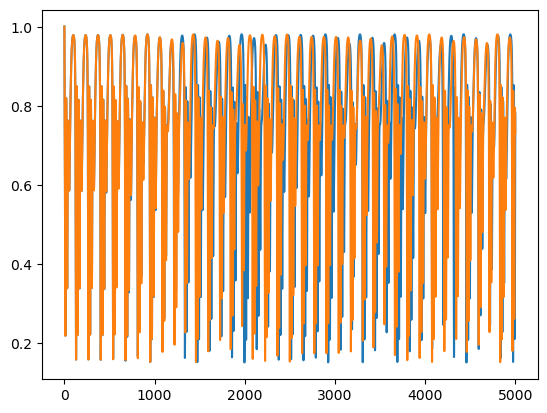

In [25]:
N_trajectories = 25
t = np.linspace(0, 5000, 100000)

state0 = np.array([1,.1,8]) + 0.001 * np.random.random((N_trajectories, 3))

state = np.asarray([odeint(HollingTanner, state0i, t)
                    for state0i in state0])

plt.plot(t, state[0,:,0])
plt.plot(t, state[1,:,0])         


# We can see that even with very small amount of noise, the graph still results in divergence of the two lines

## Excercise 2
Recall that the concept of "sensitivity to initial conditions" can be given a precise definition.

Suppose $m_0$ and $n_0$ are two sets of initial conditions for the Holling-Tanner system and $d(m_0,n_0)$ is the distance between those points.

In the Holling-Tanner system $m_0$ and $n_0$ are points in 3-dimensional space, so the distance between them can be calculated using the standard formula for Euclidean distance:

$d(m,n) = \sqrt{(x_m-x_n)^2+(y_m-y_n)^2+(z_m-z_n)^2}$

After time $t$ the points $m_0$ and $n_0$ have been integrated to $m_t$ and $n_t$. Sensitivity dependance says that $d(m_t, n_t)$ grows exponentially with time with different levels of sensitivity being associated with different values of the lyapunov exponentn $\lambda$, such that  

$d(m_t, n_t) = e^{\lambda t}d(m_0,n_0)$  

Approximate the lyapunov exponent for the Holling-Tanner system using the parameters from Excercise 1. Show your work. 

In [26]:
from scipy.spatial import distance

def compute_dst(state):
    
    dst = np.zeros((1, state.shape[1])) 
    
    for i in np.arange(0, state.shape[1]):
        dst[0,i] = distance.euclidean(state[0,i,:],state[1,i,:])
        
    return (dst.T)





/var/folders/mj/969cfm7501j0d_pl2mxjfj7c0000gn/T/ipykernel_46185/1158730973.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,10)


Approximate Lyapunov Exponent = 0.0014


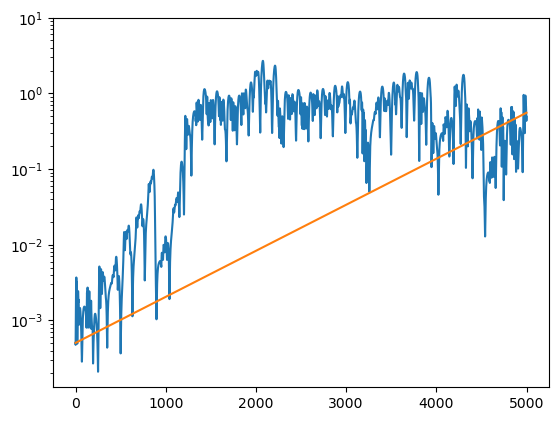

In [27]:
dst = compute_dst(state)
plt.semilogy(t,dst)

lyapunov = .0014
D0 = np.mean(dst[0])
plt.semilogy(t, D0*np.exp(lyapunov*t))

plt.ylim(0,10)

print('Approximate Lyapunov Exponent =', lyapunov)

## Excercise 3

Plot the Lorenz Map of the herbivores in the Holling-Tanner system using the abovementioned parameters.  

What happens at an Nth peak height of ~0.29? What does it represent?



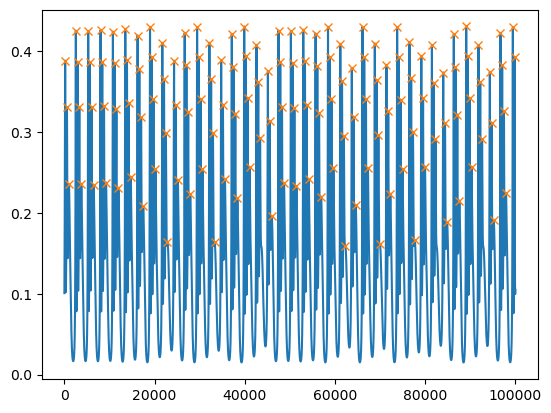

In [66]:
from scipy.signal import find_peaks

z = state[0,:,1]

peaks, _ = find_peaks(z, height = 0.1)

plt.plot(z)
plt.plot(peaks, z[peaks], 'x')

Text(0.5, 0, 'Nth Z peak height')

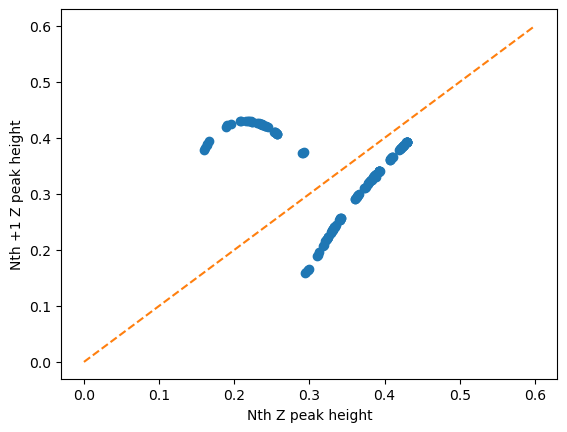

In [73]:
firstPeak = z[peaks[:-1]]
secondPeak = z[peaks[1:]]

plt.plot(firstPeak, secondPeak, 'o')
plt.plot(np.linspace(0,0.6), np.linspace(0,0.6), '--')
plt.ylabel('Nth +1 Z peak height')
plt.xlabel('Nth Z peak height')

# At an Nth peak height of ~0.29, we can see that the system is no longer in equilibrium and now oscillates in
# terms of dominance of herbivores and carnivores. 

## Excercise 4 (Extra Credit)
Demonstrate and explain why chaos can only occur in a 3D system. 
Show what you would have to do to the FitzHugh Nagumo System to bring it into a chaotic regime.
What are the tradeoffs between for an open system that must be functional (e.g. something in biology) in being almost but not quite chaotic as it approaches a parameter set that gives a lyapunov coefficient greater than 0.

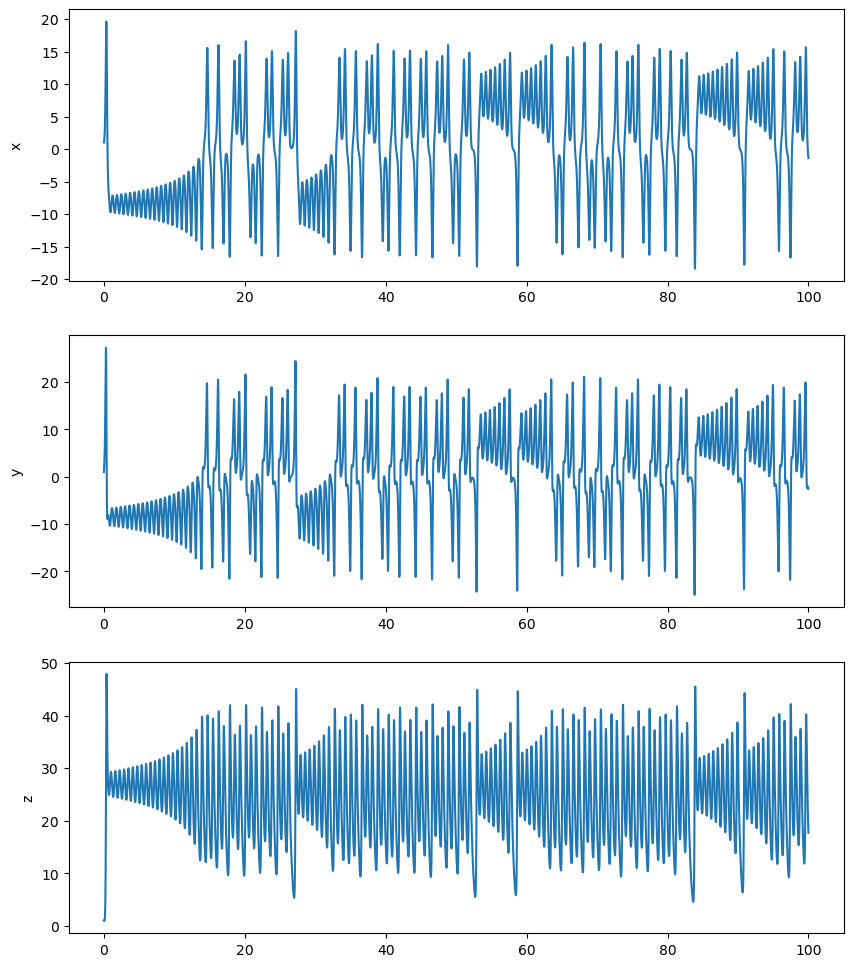

In [79]:
from scipy.integrate import solve_ivp

def lorenz(t, xyz, sigma=10, rho=28, beta=8/3):
    x, y, z = xyz
    dxdt = sigma*(y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    return [dxdt, dydt, dzdt]

initial_conditions = [1, 1, 1]
t_span = [0, 100]
t_eval = np.linspace(t_span[0], t_span[1], 10000)

solution = solve_ivp(lorenz, t_span, initial_conditions, t_eval=t_eval)

fig, axs = plt.subplots(3, 1, figsize=(10, 12))
axs[0].plot(solution.t, solution.y[0])
axs[0].set_ylabel('x')
axs[1].plot(solution.t, solution.y[1])
axs[1].set_ylabel('y')
axs[2].plot(solution.t, solution.y[2])
axs[2].set_ylabel('z')
plt.show()


# The tradeoff is that an open system incorporates more factors, but its results are unpredictable. 

Who did you work with:

In [ ]:
# Ben Brigham
